In [4]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np

from keras import optimizers
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

In [5]:
conv_base = VGG16(input_shape=(150, 150, 3),
                  weights='imagenet',
                  include_top=False)

In [7]:
path = os.getcwd()

train_dir = os.path.join(path, 'data/small_data/train/')
val_dir = os.path.join(path, 'data/small_data/validation/')
test_dir = os.path.join(path, 'data/small_data/test/')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, 
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features, labels
        

In [10]:
train_features, train_labels = extract_features(train_dir, 2000)
val_features, val_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
val_features = np.reshape(val_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(val_features, val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6055 - acc: 0.6625 - val_loss: 0.4618 - val_acc: 0.8260
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4305 - acc: 0.8075 - val_loss: 0.3825 - val_acc: 0.8460
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3603 - acc: 0.8490 - val_loss: 0.3462 - val_acc: 0.8500
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3171 - acc: 0.8695 - val_loss: 0.3290 - val_acc: 0.8510
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2960 - acc: 0.8860 - val_loss: 0.3052 - val_acc: 0.8660
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2671 - acc: 0.8940 - val_loss: 0.2930 - val_acc: 0.8680
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2511 - acc: 0.8985 - val_loss: 0.2864 - val_acc: 0.8750
Epoch 8/30
200

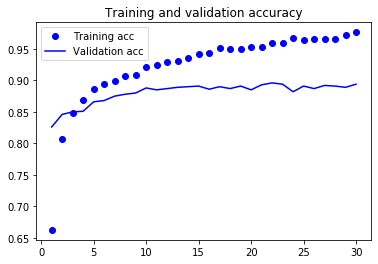

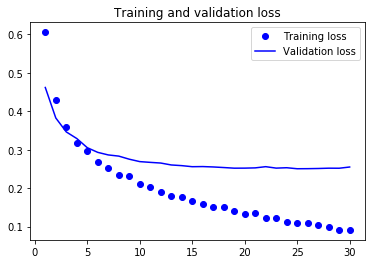

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()